#  Outlier 

An outlier is an individual point of data that is distant from other points in the dataset. It is an anomaly in the dataset that may be caused by a range of errors in capturing, processing or manipulating data

 outliers are important for some of the use case and some time they are harmful to have it in a dataset 

should we remove outliers ?

It depend on the domain

If you decided to remove outliers. Please remove them before the split(even not only before a split, it's better to do the entire analysis(stat-testing, visualization) again after removing them, you may find interesting things by doing this)

In [2]:
# if that feature have relation with label  then we should not remove those points like spikes in sales price, fraud detection 

# but if those points are not affecting the label  so we can remove then .. 

Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df["age"].isna().sum()

177

<AxesSubplot:xlabel='age', ylabel='Density'>

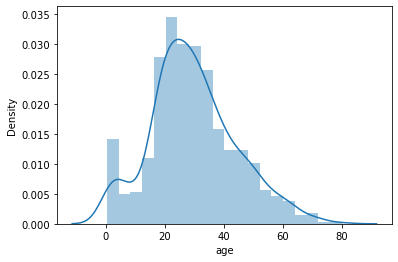

In [8]:
sns.distplot(df.age.dropna())

It looks like a normal distribution

In [9]:
# just for checking
# as there are 177 null values we filling it with higher number 
# so that some outlier will be there to deal with

<AxesSubplot:xlabel='age', ylabel='Density'>

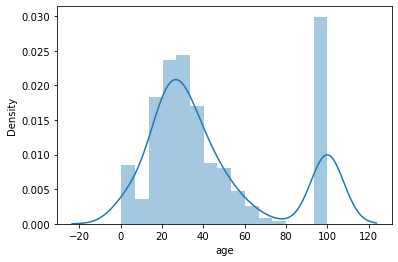

In [10]:
sns.distplot(df.age.fillna(100))

In [11]:
# now it showing outliers ( peak near  100)

Text(0, 0.5, 'no of passenger')

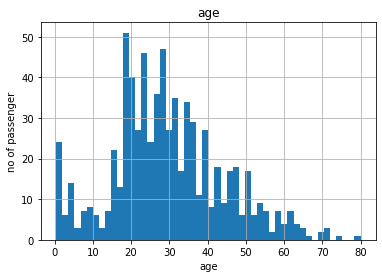

In [14]:
figure=df.age.hist(bins=50)

figure.set_title("age")
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')
# it is following gaussian distribution

In [15]:
# when ever your data is distributed  in a normal distribution or gaussian . there is different approch to find out the outliers

# To find outliers

#### for normal  distribution

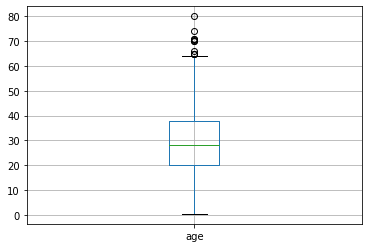

In [18]:
figure=df.boxplot("age")
# dotted pooints are outliers

In [19]:
df["age"].describe()
# to see 5 numbers summary

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [20]:
# assuming age follows gaussian distribution 
# we will calculate the boundaries which differentiates the outliers

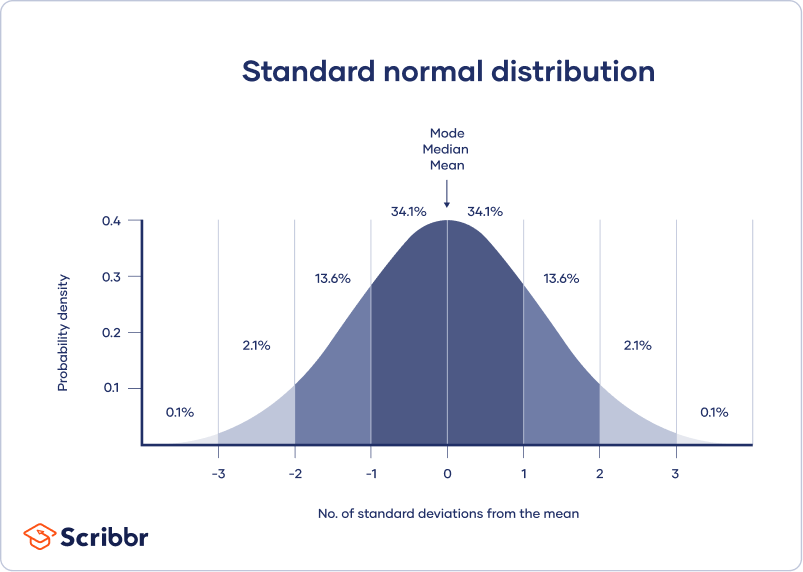

In [22]:
age_mean=df.age.mean()

In [28]:
upper_boundary=age_mean +3*df.age.std()
lower_boundary=age_mean -3*df.age.std()

In [30]:
lower_boundary,upper_boundary,age_mean

(-13.88037434994331, 73.27860964406095, 29.69911764705882)

In [ ]:
# note
# in age negative value will not be there 


####  for gaussian/ normal distribution we have to do till here ..
we can consider lower_boundary,upper_boundary as our range

#### finding IQR  just  to show 

In [54]:
q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)

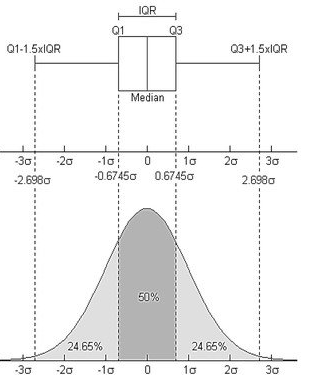

In [55]:
IQR=q3-q1

In [56]:
IQR

17.875

In [36]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [37]:
lower_fence,upper_fence


(-6.6875, 64.8125)

In [38]:
# here lower fence is negative --> age cannot be negative so we are not gonna consider negative value

In [41]:
# to calculate the extreme  boundaries  then for  extreme outliers
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [42]:
# extreme outliers
lower_extreme,upper_extreme


(-33.5, 91.625)

after 91.625 which is no where close to max       80.000000

In [43]:
# right now  we are considering lower_boundary,upper_boundary

#### Feature is Skewed

Text(0, 0.5, 'no of passenger')

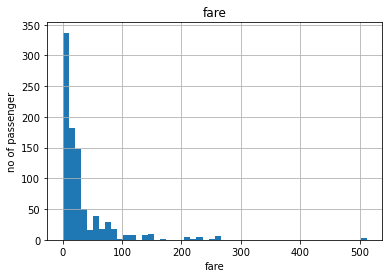

In [50]:
figure=df.fare.hist(bins=50)

figure.set_title("fare")
figure.set_xlabel('fare')
figure.set_ylabel('no of passenger')
# right Skewed

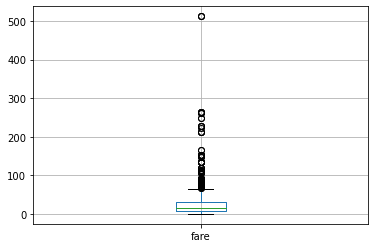

In [47]:
figure=df.boxplot("fare")
# dotted pooints are outliers

In [51]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [52]:
#difference between max value and min value is too huge

In [53]:
# for such kind of distribution hout to calculate IQR,  lower_fence and upper_fence

#### note 
1. in the case of gaussian or normal distribution we can say that iqr range will work
2. when we are dealing with skewed data we are not sure that this iqr range will work or not , you have to verify 

In [70]:
df["fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [64]:
q1=df["fare"].quantile(0.25)
q3=df["fare"].quantile(0.75)

In [65]:
IOR=q3-q1

In [66]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [67]:
lower_fence,upper_fence

(-18.9021, 57.8125)

In [68]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [72]:
# extreme outliers
lower_extreme,upper_extreme

(-45.7146, 84.625)

In [73]:
# we are considering  lower_extreme,upper_extreme
# note fare cannot be negative so lower_extreme cannot be negative

#### hanling the outliers based on range that we have found

In [77]:
data=df.copy()

In [ ]:
# first we will deal with  age

In [75]:
lower_boundary,upper_boundary,age_mean
# w.r.t age that we have found earlier

(-13.88037434994331, 73.27860964406095, 29.69911764705882)

In [78]:
data.loc[data["age"]>=upper_boundary,"age"]=upper_boundary
# all the values which are greater than upper_boundary, , we are replacing it with upper_boundary

In [ ]:
# generatlly we do this
'''df['feature'] = np.where(
    df['feature']>upper_limit,
    upper_limit,
    np.where(
        df['feature']<lower_limit,
        lower_limit,
        df['feature']
    )
)'''

In [79]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### before

Text(0, 0.5, 'no of passenger')

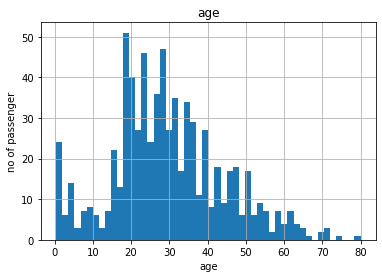

In [82]:
figure=df.age.hist(bins=50)

figure.set_title("age")
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')


### after

Text(0, 0.5, 'no of passenger')

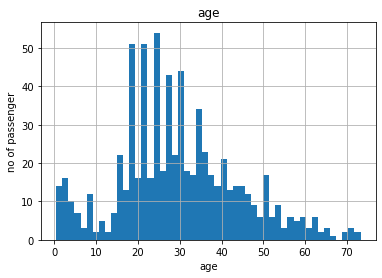

In [83]:
figure=data.age.hist(bins=50)

figure.set_title("age")
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')

In [84]:
# noe we will deal with  fare

In [85]:
# extreme values which we found earlier for fare
lower_extreme,upper_extreme

(-45.7146, 84.625)

In [86]:
data.loc[data["fare"]>=upper_extreme,"fare"]=upper_extreme

### before

Text(0, 0.5, 'no of passenger')

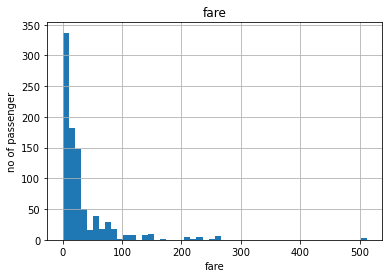

In [87]:
figure=df.fare.hist(bins=50)

figure.set_title("fare")
figure.set_xlabel('fare')
figure.set_ylabel('no of passenger')

### after

Text(0, 0.5, 'no of passenger')

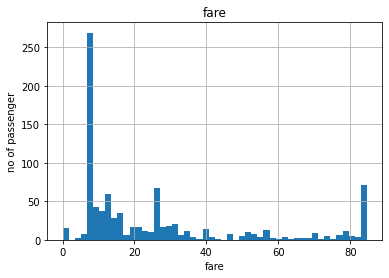

In [88]:
figure=data.fare.hist(bins=50)

figure.set_title("fare")
figure.set_xlabel('fare')
figure.set_ylabel('no of passenger')

In [ ]:
# now the looks more normally distribured

In [89]:
# note 
# we can also remove outliers if we are having large dataset 
# but if record is less then don't remoev it

### Percentile Method 

In [96]:
# here we take custom threshold ( generally 1% - 99%)

-> are selecting the threshold we

 remove them or capping ( also known as  Winsorization Technique )

In [101]:
df=pd.read_csv(r"weight-height.csv")

In [102]:
df.shape

(10000, 4)

In [103]:
df.head()

,Unnamed: 0,Gender,Height,Weight
0,0,Male,73.847017,241.893563
1,1,Male,68.781904,162.310473
2,2,Male,74.110105,212.740856
3,3,Male,71.730978,220.042470
4,4,Male,69.881796,206.349801


In [104]:
df["Height"].describecribe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

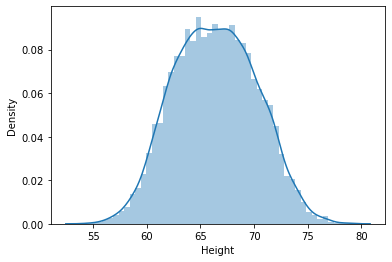

In [108]:
sns.distplot(df.Height)

##### almost normally distributed

<AxesSubplot:xlabel='Height'>

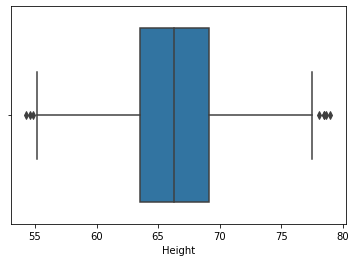

In [109]:
sns.boxplot(df.Height)

In [110]:
# it have some outliers

In [111]:
# so we set a custom thresold

In [112]:
upper_limit=df["Height"].quantile(0.99)
lower_limit=df["Height"].quantile(0.01)

In [113]:
upper_limit,lower_limit

(74.7857900583366, 58.13441158671655)

In [114]:
# not you have to be clear that you have to take equal amount ( symmetric ) for both upper and lower limit

In [116]:
df[(df["Height"]>=upper_limit)  (df["Height"]<=lower_limit)]

,Unnamed: 0,Gender,Height,Weight
23,23,Male,75.205974,228.761781
190,190,Male,76.709835,235.035419
197,197,Male,75.944460,231.924749
202,202,Male,75.140821,224.124271
215,215,Male,74.795375,232.635403
...,...,...,...,...
9761,9761,Female,56.975279,90.341784
9825,9825,Female,55.979198,85.417534
9895,9895,Female,57.740192,93.652957
9904,9904,Female,57.028857,101.202551


In [117]:
# 200 rows are not in the range  set by us

In [119]:
# to exclude it
new_df=df[(df["Height"]<=upper_limit) & (df["Height"]>=lower_limit)]

In [120]:
new_df.head()

,Unnamed: 0,Gender,Height,Weight
0,0,Male,73.847017,241.893563
1,1,Male,68.781904,162.310473
2,2,Male,74.110105,212.740856
3,3,Male,71.730978,220.042470
4,4,Male,69.881796,206.349801


In [124]:
# originally
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [125]:
new_df.Height.describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

SD-> chnaged
min_vale-> increased
max_vale-> decreased
other -> almost same

<AxesSubplot:xlabel='Height', ylabel='Density'>

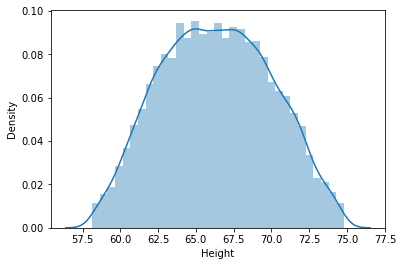

In [126]:
sns.distplot(new_df.Height)

In [127]:
# not much variation

<AxesSubplot:xlabel='Height'>

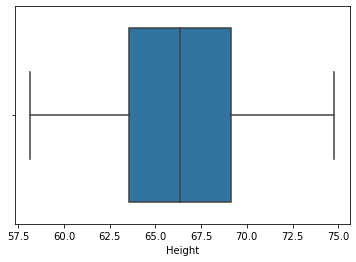

In [128]:
sns.boxplot(new_df.Height)

In [ ]:
# it is showing no outlier

In [129]:
##### capping- > Winsorization Technique

In [130]:
df['Height'] = np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(
        df['Height']<lower_limit,
        lower_limit,
        df['Height']
    )
)

In [131]:
df.shape

(10000, 4)

In [133]:
# after Winsorization Technique
df.Height.describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

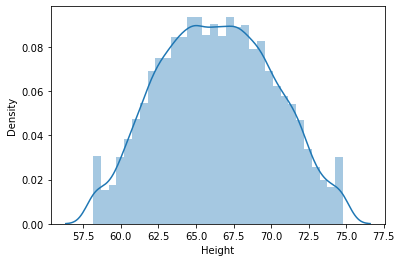

In [134]:
sns.distplot(df.Height)

<AxesSubplot:xlabel='Height'>

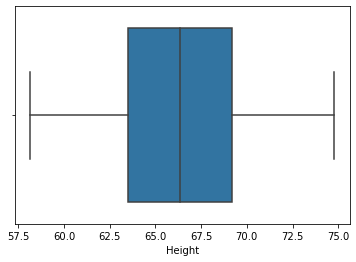

In [135]:
sns.boxplot(df.Height)

In [ ]:
s